In [1]:
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
from lofo import LOFOImportance, Dataset, plot_importance

from lightgbm import LGBMClassifier, LGBMRegressor

from xgboost import XGBClassifier

%matplotlib inline

C:\Users\kince\Anaconda3\envs\KerasTF\lib\site-packages\lofo\lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# import data
data_df_1 = pd.read_csv("../../data/training_validation_1.csv")
data_df_2 = pd.read_csv("../../data/training_validation_2.csv")
data_df_3 = pd.read_csv("../../data/model_refinement.csv")

merged_df = pd.concat([data_df_1, data_df_2, data_df_3], axis=0) # Merge data frames


In [3]:
train_df = merged_df.filter(regex="vCnt|value|class")

In [4]:
# extract a sample of the data
sample_df = train_df.sample(frac=0.5, random_state=42)
#sample_df.sort_values("run", inplace=True)

In [10]:
# define the validation scheme
cv = KFold(n_splits=3, shuffle=True, random_state=42)
# cv = StratifiedKFold(n_splits=4, shuffle=False, random_state=0, )

In [11]:
# define the binary target and the features
dataset = Dataset(df=sample_df, target="class", features=[col for col in train_df.columns if col != 'class'])

In [12]:
model = LGBMClassifier()

# model = XGBClassifier()

In [13]:
# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, model=model, scoring="f1_micro")

In [14]:
# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

  0%|          | 0/79 [00:00<?, ?it/s]

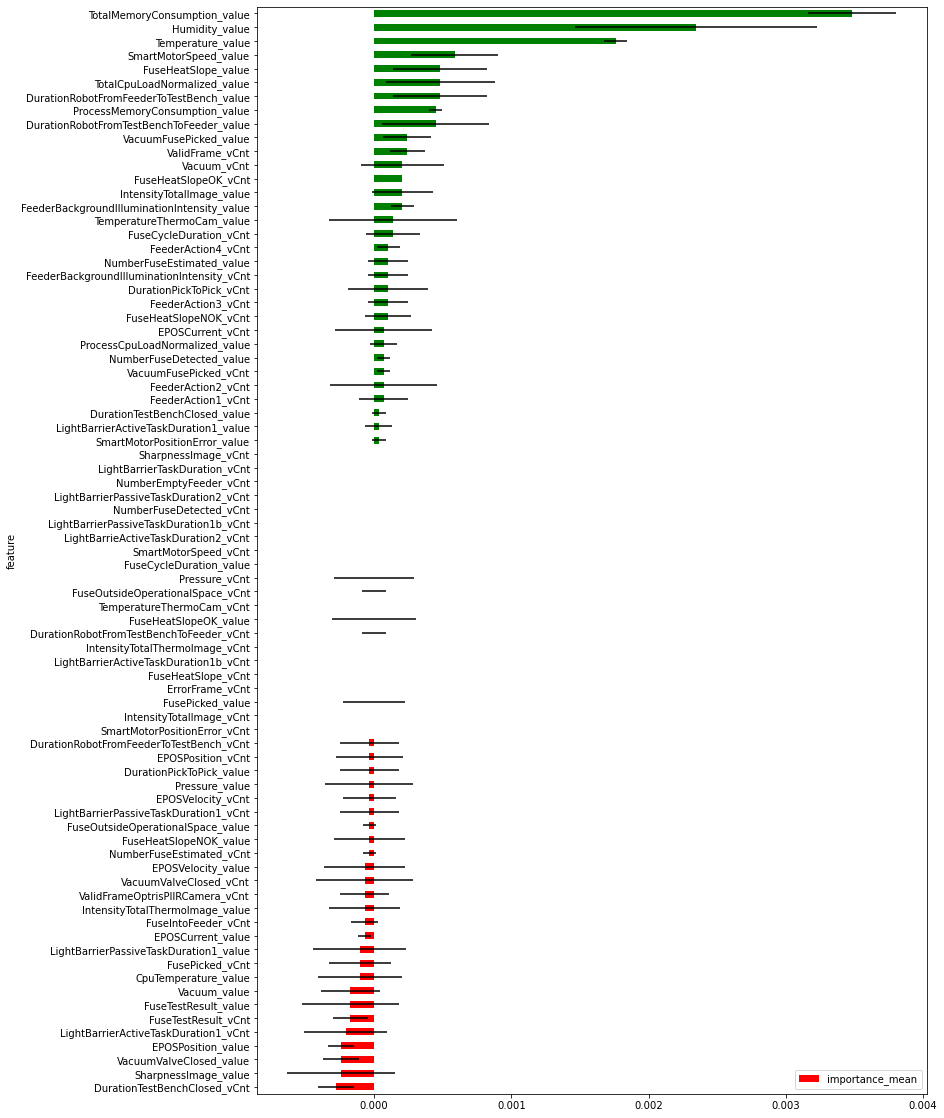

In [15]:
# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20))

In [21]:
len(sorted(list(importance_df[importance_df.importance_mean>0].feature)))

32